# OSE Baseline Model v2

This notebook provides a baseline model for signals. 

Deletion of "Nbre signaux total"


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set path to datasets
DATA_DIR = Path('../src/ose_core/data_ingestion/extracted_datasets')

print("Libraries imported successfully!")


Libraries imported successfully!


## Signals dataset

This dataset contains company signals and events.

**Note:** Only 70.9% of companies have signals (266 out of 375). Each company can have multiple signals.

**Use case:** Event tracking, signal analysis, company activity monitoring.


In [2]:
# Load signals data
df_signals = pd.read_csv(DATA_DIR / '08_signals.csv', dtype={'siren': str, 'siret': str})

print(f"Dataset shape: {df_signals.shape}")
print(f"\nColumns: {list(df_signals.columns)}")
display(df_signals.head(10))

Dataset shape: (2133, 12)

Columns: ['company_name', 'siren', 'siret', 'continent', 'country', 'departement', 'publishedAt', 'isMain', 'type', 'createdAt', 'companies_count', 'sirets_count']


,company_name,siren,siret,continent,country,departement,publishedAt,isMain,type,createdAt,companies_count,sirets_count
0,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2021-09-30T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2020-09-07T15:14:38+02:00,1,1
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2020-09-08T00:00:00+02:00,True,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-07T15:14:12+02:00,1,1
2,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-09-21T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-20T10:45:13+02:00,1,1
3,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2018-04-05T11:16:18+02:00,1,1
4,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'E', 'id': 5, 'label': 'Créations & o...",2018-04-05T11:15:32+02:00,1,1
5,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'H', 'id': 8, 'label': 'Activité inte...",2018-04-05T11:14:31+02:00,1,1
6,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2014-05-20T00:00:00+02:00,True,"{'code': 'X', 'id': 25, 'label': 'Actualité en...",2014-05-16T10:10:24+02:00,1,1
7,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-04-01T00:00:00+02:00,True,"{'code': 'U', 'id': 21, 'label': 'Nomination'}",2016-03-31T12:48:27+02:00,1,1
8,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,"[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2016-09-21T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2016-09-20T10:45:56+02:00,1,1
9,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-04-01T00:00:00+02:00,True,"{'code': 'Hbis', 'id': 24, 'label': 'Activité ...",2016-03-28T19:33:31+02:00,1,1


In [3]:
# Summary
print(f"\nSignals Summary:")
print(f"Total signal records: {len(df_signals)}")
print(f"Unique companies with signals: {df_signals['siren'].nunique()}")
print(f"Average signals per company: {len(df_signals) / df_signals['siren'].nunique():.1f}")
print(f"\nSignal types:")
if 'type' in df_signals.columns:
    print(df_signals['type'].value_counts().head(10))
print(f"\nCountries:")
if 'country' in df_signals.columns:
    print(df_signals['country'].value_counts().head(10))



Signals Summary:
Total signal records: 2133
Unique companies with signals: 266
Average signals per company: 8.0

Signal types:
type
{'code': 'B', 'id': 2, 'label': 'Construction'}                                       309
{'code': 'K1', 'id': 32, 'label': 'Investissements'}                                  282
{'code': 'N', 'id': 14, 'label': 'Recrutement'}                                       214
{'code': 'L', 'id': 12, 'label': 'Levée de fonds, financements & modifs. capital'}    205
{'code': 'F', 'id': 6, 'label': "Développement de l'activité"}                        193
{'code': 'Hbis', 'id': 24, 'label': 'Activité internationale (industrie)'}            129
{'code': 'P', 'id': 16, 'label': 'Vente & Cession'}                                   105
{'code': 'S', 'id': 19, 'label': 'Lancement'}                                          87
{'code': 'E', 'id': 5, 'label': 'Créations & ouvertures'}                              63
{'code': 'U', 'id': 21, 'label': 'Nomination'}           

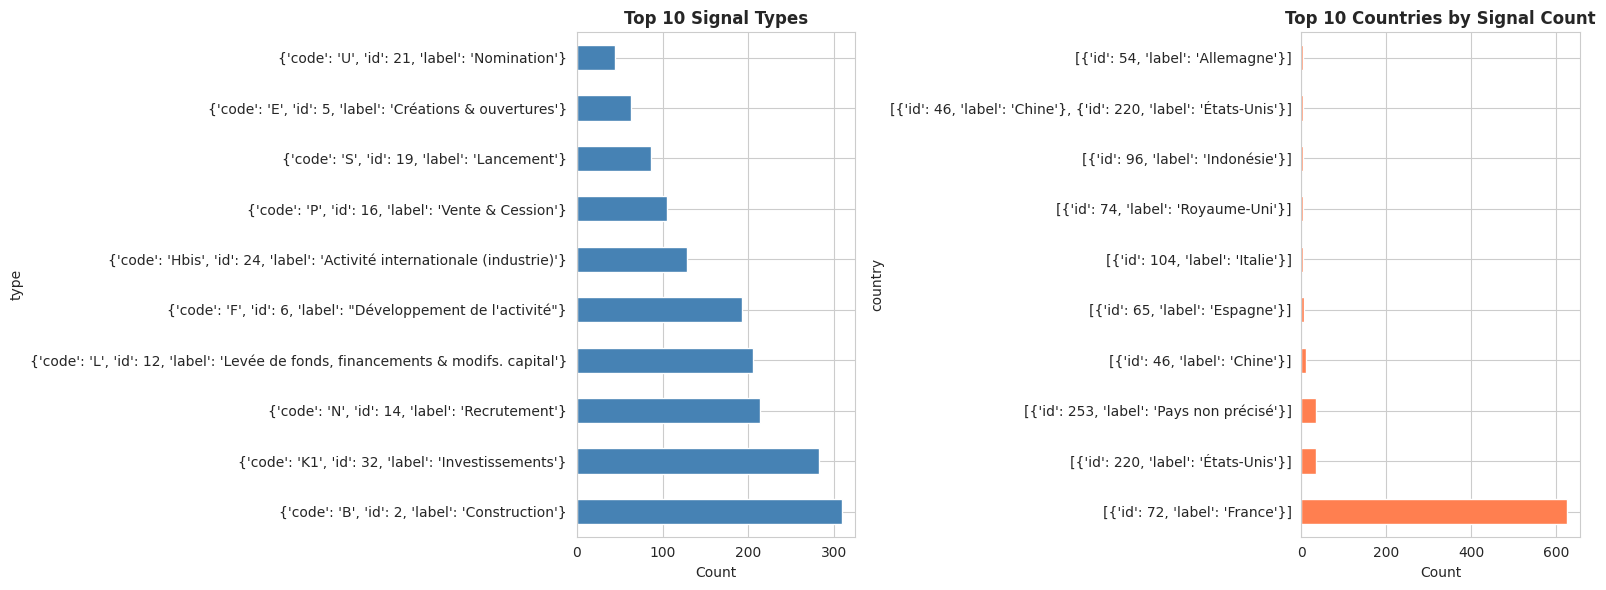

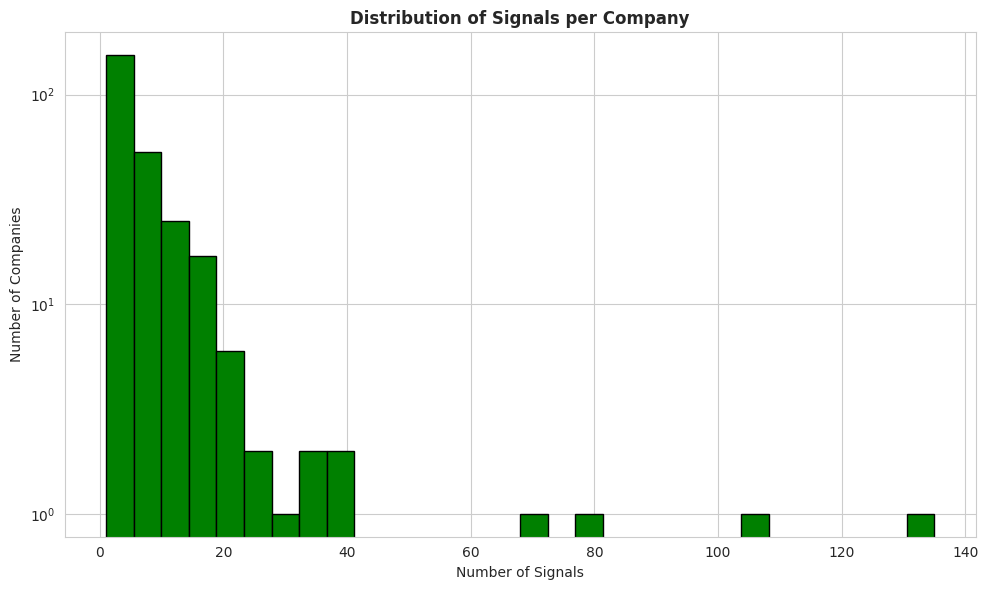

In [4]:
# Visualize signals
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Signal types
if 'type' in df_signals.columns:
    signal_types = df_signals['type'].value_counts().head(10)
    signal_types.plot(kind='barh', ax=axes[0], color='steelblue')
    axes[0].set_title('Top 10 Signal Types', fontweight='bold')
    axes[0].set_xlabel('Count')

# Countries
if 'country' in df_signals.columns:
    countries = df_signals['country'].value_counts().head(10)
    countries.plot(kind='barh', ax=axes[1], color='coral')
    axes[1].set_title('Top 10 Countries by Signal Count', fontweight='bold')
    axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Signals per company distribution
signals_per_company = df_signals.groupby('siren').size()
plt.figure(figsize=(10, 6))
signals_per_company.hist(bins=30, color='green', edgecolor='black')
plt.title('Distribution of Signals per Company', fontweight='bold')
plt.xlabel('Number of Signals')
plt.ylabel('Number of Companies')
plt.yscale('log')
plt.tight_layout()
plt.show()


## Préparation datasets signaux

In [5]:
display(df_signals.head(5))

,company_name,siren,siret,continent,country,departement,publishedAt,isMain,type,createdAt,companies_count,sirets_count
0,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2021-09-30T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2020-09-07T15:14:38+02:00,1,1
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2020-09-08T00:00:00+02:00,True,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-07T15:14:12+02:00,1,1
2,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-09-21T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-20T10:45:13+02:00,1,1
3,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2018-04-05T11:16:18+02:00,1,1
4,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'E', 'id': 5, 'label': 'Créations & o...",2018-04-05T11:15:32+02:00,1,1


In [6]:
df_signals.columns

Index(['company_name', 'siren', 'siret', 'continent', 'country', 'departement',
       'publishedAt', 'isMain', 'type', 'createdAt', 'companies_count',
       'sirets_count'],
      dtype='object')

In [7]:
df_sig = df_signals.copy()

In [8]:
#nettoyage
#transfo date
def to_datetime_robust(series):
    """
    Convertit une série en datetime en gérant :
    - timestamps numériques (en secondes)
    - strings '2024-01-01T...' ou similaires
    """
    if np.issubdtype(series.dtype, np.number):
        return pd.to_datetime(series, unit="s", errors="coerce")
    else:
        return pd.to_datetime(series, errors="coerce")


In [9]:
# SIREN en string
df_sig["siren"] = df_sig["siren"].astype(str)


df_sig["publishedAt_dt"] = to_datetime_robust(df_sig["publishedAt"])
df_sig["createdAt_dt"]   = to_datetime_robust(df_sig["createdAt"])

# Date du signal : priorité publishedAt, sinon createdAt
df_sig["sig_date"] = df_sig["publishedAt_dt"].fillna(df_sig["createdAt_dt"])

# (optionnel mais propre) : enlever les lignes sans date exploitable
df_sig = df_sig[~df_sig["sig_date"].isna()].copy()

# Petit check
display(df_sig['type'].value_counts().head(10))
display(df_sig[["siren", "type", "sig_date"]].head())

/tmp/ipykernel_128220/1304345844.py:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  return pd.to_datetime(series, errors="coerce")
/tmp/ipykernel_128220/1304345844.py:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  return pd.to_datetime(series, errors="coerce")


type
{'code': 'B', 'id': 2, 'label': 'Construction'}                                       309
{'code': 'K1', 'id': 32, 'label': 'Investissements'}                                  282
{'code': 'N', 'id': 14, 'label': 'Recrutement'}                                       214
{'code': 'L', 'id': 12, 'label': 'Levée de fonds, financements & modifs. capital'}    205
{'code': 'F', 'id': 6, 'label': "Développement de l'activité"}                        193
{'code': 'Hbis', 'id': 24, 'label': 'Activité internationale (industrie)'}            129
{'code': 'P', 'id': 16, 'label': 'Vente & Cession'}                                   105
{'code': 'S', 'id': 19, 'label': 'Lancement'}                                          87
{'code': 'E', 'id': 5, 'label': 'Créations & ouvertures'}                              63
{'code': 'U', 'id': 21, 'label': 'Nomination'}                                         45
Name: count, dtype: int64

,siren,type,sig_date
0,015751530,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2021-09-30 00:00:00+02:00
1,015751530,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-08 00:00:00+02:00
2,015751530,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-21 00:00:00+02:00
3,015751530,"{'code': 'F', 'id': 6, 'label': ""Développement...",2018-04-06 00:00:00+02:00
4,015751530,"{'code': 'E', 'id': 5, 'label': 'Créations & o...",2018-04-06 00:00:00+02:00


In [10]:
df_sig.head()

,company_name,siren,siret,continent,country,departement,publishedAt,isMain,type,createdAt,companies_count,sirets_count,publishedAt_dt,createdAt_dt,sig_date
0,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2021-09-30T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2020-09-07T15:14:38+02:00,1,1,2021-09-30 00:00:00+02:00,2020-09-07 15:14:38+02:00,2021-09-30 00:00:00+02:00
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2020-09-08T00:00:00+02:00,True,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-07T15:14:12+02:00,1,1,2020-09-08 00:00:00+02:00,2020-09-07 15:14:12+02:00,2020-09-08 00:00:00+02:00
2,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-09-21T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-20T10:45:13+02:00,1,1,2016-09-21 00:00:00+02:00,2016-09-20 10:45:13+02:00,2016-09-21 00:00:00+02:00
3,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2018-04-05T11:16:18+02:00,1,1,2018-04-06 00:00:00+02:00,2018-04-05 11:16:18+02:00,2018-04-06 00:00:00+02:00
4,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'E', 'id': 5, 'label': 'Créations & o...",2018-04-05T11:15:32+02:00,1,1,2018-04-06 00:00:00+02:00,2018-04-05 11:15:32+02:00,2018-04-06 00:00:00+02:00


In [11]:
import ast

def normalize_type(type_str):
    """
    À partir d'une chaîne du type "{'code': 'L', 'label_short': ..., 'id': 12, 'label': ...}",
    retourne un identifiant unique basé uniquement sur code + id + label.
    """
    try:
        d = ast.literal_eval(type_str)  # convertir la string en dict
        code = d.get("code")
        type_id = d.get("id")
        label = d.get("label")
        return f"{code}_{type_id}_{label}"
    except:
        return None

df_sig["type_normalized"] = df_sig["type"].apply(normalize_type)

In [12]:
df_pivot = (
    df_sig
      .groupby(["siren", "type_normalized"])
      .size()
      .reset_index(name="count")
      .pivot(index="siren", columns="type_normalized", values="count")
      .fillna(0)
)

df_pivot.head(5)

type_normalized,A_1_Aménagement & urbanisme,B_2_Construction,D_4_Litige,D_4_Litiges,E_5_Création & ouverture,E_5_Créations & ouvertures,F_6_Croissance,F_6_Développement de l'activité,G_7_Déménagement,H_8_Activité internationale (tertiaire),...,R_18_Décroissance,S_19_Lancement,U_21_Nomination,W_23_Foncier & bâti,X_25_Actualité entreprise,Y_26_Veille sectorielle,Z1_29_Engagement vert,"Z2_30_Restructuration, Réorganisation",Z3_33_Politique RH & RSE,Z_27_Salon & agenda
siren,,,,,,,,,,,,,,,,,,,,,
015751530,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
046580031,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
057504649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
086781150,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
096780838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [13]:
# diversité des signaux
df_pivot["diversite_signaux"] = (df_pivot > 0).sum(axis=1)
#print(df_pivot["diversite_signaux"].head)


In [14]:
df_recency = (
    df_sig
      .groupby("siren")["sig_date"]
      .max()
      .reset_index()
      .rename(columns={"sig_date": "last_signal_date"})
)
df_recency.head(5)

,siren,last_signal_date
0,015751530,2025-03-03 00:15:21+01:00
1,046580031,2022-08-08 00:00:00+02:00
2,057504649,2024-06-16 00:00:00+02:00
3,086781150,2023-06-29 00:00:00+02:00
4,096780838,2024-03-11 00:00:00+01:00


In [15]:
# date signal la plus récente
reference_date = df_recency["last_signal_date"].max()
reference_date

Timestamp('2025-11-19 00:15:35+0100', tz='UTC+01:00')

In [16]:
df_recency["last_signal_date"] = pd.to_datetime(
    df_recency["last_signal_date"],
    errors="coerce"
)

# Delta en jours
df_recency["recency_jours"] = (reference_date - df_recency["last_signal_date"]).dt.days

df_recency["recency_jours"].head(5)

0    261.0
1      NaN
2      NaN
3      NaN
4    618.0
Name: recency_jours, dtype: float64

In [17]:
# merge signaux et recency par siren pour le model
df_model = df_pivot.merge(df_recency[["siren", "recency_jours"]], on="siren", how="left")
# dégager les NaN dans recency
df_model["recency_jours"] = df_model["recency_jours"].fillna(df_model["recency_jours"].max())
df_model.head()

,siren,A_1_Aménagement & urbanisme,B_2_Construction,D_4_Litige,D_4_Litiges,E_5_Création & ouverture,E_5_Créations & ouvertures,F_6_Croissance,F_6_Développement de l'activité,G_7_Déménagement,...,U_21_Nomination,W_23_Foncier & bâti,X_25_Actualité entreprise,Y_26_Veille sectorielle,Z1_29_Engagement vert,"Z2_30_Restructuration, Réorganisation",Z3_33_Politique RH & RSE,Z_27_Salon & agenda,diversite_signaux,recency_jours
0,015751530,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11,261.0
1,046580031,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4017.0
2,057504649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4017.0
3,086781150,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4017.0
4,096780838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5,618.0


In [18]:
# S'assurer que sig_date est bien au format datetime
df_sig["sig_date"] = pd.to_datetime(df_sig["sig_date"], errors="coerce")

# Optionnel : virer les lignes qui n'ont toujours pas de date exploitable
df_sig = df_sig[~df_sig["sig_date"].isna()].copy()

# nouvelle info mois
df_sig["month"] = df_sig["sig_date"].dt.to_period("M")
last_month = df_sig["month"].max()
three_months_ago = last_month - 2  # last month, -1, -2 = 3 mois
twelve_months_ago = last_month - 11
two_years_ago = last_month - 23
tree_years_ago = last_month - 35
four_years_ago = last_month - 47
five_years_ago = last_month - 59
six_years_ago = last_month - 71
seven_years_ago = last_month - 83
eight_years_ago = last_month - 95
nine_years_ago = last_month - 107
ten_years_ago = last_month - 119
print(f"Last month : {last_month}, 3 months ago: {three_months_ago}, 1 year ago: {twelve_months_ago}, 2 years ago: {two_years_ago}, 3 years ago: {tree_years_ago}, 4 years ago: {four_years_ago}, 5 years ago: {five_years_ago}, 6 years ago: {six_years_ago}, 7 years ago: {seven_years_ago}, 8 years ago: {eight_years_ago}, 9 years ago: {nine_years_ago}, 10 years ago: {ten_years_ago}")

Last month : 2025-10, 3 months ago: 2025-08, 1 year ago: 2024-11, 2 years ago: 2023-11, 3 years ago: 2022-11, 4 years ago: 2021-11, 5 years ago: 2020-11, 6 years ago: 2019-11, 7 years ago: 2018-11, 8 years ago: 2017-11, 9 years ago: 2016-11, 10 years ago: 2015-11


/tmp/ipykernel_128220/4243298923.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_sig["month"] = df_sig["sig_date"].dt.to_period("M")


In [19]:
# signaux 1 mois
df_1m = df_sig[df_sig["month"] == last_month]
df_1m = df_1m.groupby("siren").size().reset_index(name="nb_signaux_1m")
# signaux 3 mois
df_3m = df_sig[(df_sig["month"] >= three_months_ago) & (df_sig["month"] <= last_month)]
df_3m = df_3m.groupby("siren").size().reset_index(name="nb_signaux_3m")
# signaux 12 mois
df_12m = df_sig[(df_sig["month"] >= twelve_months_ago) & (df_sig["month"] <= three_months_ago)]
df_12m = df_12m.groupby("siren").size().reset_index(name="nb_signaux_12m")
# signaux 24 mois
df_24m = df_sig[(df_sig["month"] >= two_years_ago) & (df_sig["month"] <= twelve_months_ago)]
df_24m = df_24m.groupby("siren").size().reset_index(name="nb_signaux_2y")
# signaux 36 mois
df_36m = df_sig[(df_sig["month"] >= tree_years_ago) & (df_sig["month"] <= two_years_ago)]
df_36m = df_36m.groupby("siren").size().reset_index(name="nb_signaux_3y")
# signaux 4 ans
df_4y = df_sig[(df_sig["month"] >= four_years_ago) & (df_sig["month"] <= tree_years_ago)]
df_4y = df_4y.groupby("siren").size().reset_index(name="nb_signaux_4y")
# signaux 5 ans
df_5y = df_sig[(df_sig["month"] >= five_years_ago) & (df_sig["month"] <= four_years_ago)]
df_5y = df_5y.groupby("siren").size().reset_index(name="nb_signaux_5y")
# signaux 6 ans
df_6y = df_sig[(df_sig["month"] >= six_years_ago) & (df_sig["month"] <= five_years_ago)]
df_6y = df_6y.groupby("siren").size().reset_index(name="nb_signaux_6y")
# signaux 7 ans
df_7y = df_sig[(df_sig["month"] >= seven_years_ago) & (df_sig["month"] <= six_years_ago)]
df_7y = df_7y.groupby("siren").size().reset_index(name="nb_signaux_7y")
# signaux 8 ans
df_8y = df_sig[(df_sig["month"] >= eight_years_ago) & (df_sig["month"] <= seven_years_ago)]
df_8y = df_8y.groupby("siren").size().reset_index(name="nb_signaux_8y")
# signaux 9 ans
df_9y = df_sig[(df_sig["month"] >= nine_years_ago) & (df_sig["month"] <= eight_years_ago)]
df_9y = df_9y.groupby("siren").size().reset_index(name="nb_signaux_9y")
# signaux 10 ans
df_10y = df_sig[(df_sig["month"] >= ten_years_ago) & (df_sig["month"] <= nine_years_ago)]
df_10y = df_10y.groupby("siren").size().reset_index(name="nb_signaux_10y")
#df_sig.head()
#df_1m.head()

In [20]:
test = df_sig[(df_sig["month"] >= four_years_ago) & (df_sig["month"] <= tree_years_ago)]

display(test["publishedAt"].min())
display(test["publishedAt"].max())

'2022-04-01T00:00:00+02:00'

'2022-10-28T00:00:00+02:00'

In [21]:
# trop bizarre, des trous pas de signaux sur janvier à mars par exemple
display(df_sig["month"].sort_values(ascending=True))

659     2013-05
1237    2013-09
1738    2014-04
1758    2014-04
1756    2014-04
         ...   
54      2025-10
55      2025-10
398     2025-10
1951    2025-10
1726    2025-10
Name: month, Length: 1175, dtype: period[M]

In [22]:
#df_1m exclus
df_model_update = (
    df_model
      .merge(df_3m, on="siren", how="left")
      .merge(df_12m, on="siren", how="left")
      .merge(df_24m, on="siren", how="left")
      .merge(df_36m, on="siren", how="left")
      .merge(df_4y, on="siren", how="left")
      .merge(df_5y, on="siren", how="left")
      .merge(df_6y, on="siren", how="left")
      .merge(df_7y, on="siren", how="left")
      .merge(df_8y, on="siren", how="left")
      .merge(df_9y, on="siren", how="left")
      .merge(df_10y, on="siren", how="left")

)

for col in ["nb_signaux_3m", "nb_signaux_12m", "nb_signaux_2y", "nb_signaux_3y", "nb_signaux_4y", "nb_signaux_5y", "nb_signaux_6y", "nb_signaux_7y", "nb_signaux_8y", "nb_signaux_9y", "nb_signaux_10y"]:
    df_model_update[col] = df_model_update[col].fillna(0)

df_model_update.head(5)

,siren,A_1_Aménagement & urbanisme,B_2_Construction,D_4_Litige,D_4_Litiges,E_5_Création & ouverture,E_5_Créations & ouvertures,F_6_Croissance,F_6_Développement de l'activité,G_7_Déménagement,...,nb_signaux_12m,nb_signaux_2y,nb_signaux_3y,nb_signaux_4y,nb_signaux_5y,nb_signaux_6y,nb_signaux_7y,nb_signaux_8y,nb_signaux_9y,nb_signaux_10y
0,015751530,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,7.0
1,046580031,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,057504649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,086781150,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,096780838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#suppression nb_signaux_total et nb_signaux_1m
#label générique : plus l'entreprise à de signaux plus elle est active, juste pour faire tourner le model avec un y
df_model_update["y_gen"] = (
    df_model_update["nb_signaux_10y"] +
    df_model_update["nb_signaux_9y"] +
    df_model_update["nb_signaux_8y"] +
    df_model_update["nb_signaux_7y"] +
    df_model_update["nb_signaux_6y"] +
    df_model_update["nb_signaux_5y"] +
    df_model_update["nb_signaux_4y"] +
    df_model_update["nb_signaux_3y"] +
    df_model_update["nb_signaux_2y"] +
    df_model_update["nb_signaux_12m"] +
    df_model_update["nb_signaux_3m"] +
    df_model_update["diversite_signaux"]
)
df_model_update["y_gen"].head(5)

0    23.0
1     8.0
2     3.0
3     3.0
4     5.0
Name: y_gen, dtype: float64

In [24]:
# normalisation pour meilleure lecture
df_model_update["y_gen_norm"] = (df_model_update["y_gen"] - df_model_update["y_gen"].mean()) / df_model_update["y_gen"].std()
df_model_update.head(5)

,siren,A_1_Aménagement & urbanisme,B_2_Construction,D_4_Litige,D_4_Litiges,E_5_Création & ouverture,E_5_Créations & ouvertures,F_6_Croissance,F_6_Développement de l'activité,G_7_Déménagement,...,nb_signaux_3y,nb_signaux_4y,nb_signaux_5y,nb_signaux_6y,nb_signaux_7y,nb_signaux_8y,nb_signaux_9y,nb_signaux_10y,y_gen,y_gen_norm
0,015751530,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,1.0,1.0,0.0,3.0,0.0,7.0,23.0,1.569595
1,046580031,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,-0.047416
2,057504649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-0.586420
3,086781150,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-0.586420
4,096780838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,-0.370818


In [25]:
df_pivot.columns

Index(['A_1_Aménagement & urbanisme', 'B_2_Construction', 'D_4_Litige',
       'D_4_Litiges', 'E_5_Création & ouverture', 'E_5_Créations & ouvertures',
       'F_6_Croissance', 'F_6_Développement de l'activité', 'G_7_Déménagement',
       'H_8_Activité internationale (tertiaire)',
       'Hbis_24_Activité internationale (industrie)', 'I_9_Fermeture',
       'I_9_Fermetures', 'K1_32_Investissements',
       'L_12_Levée de fonds, financements & modifs. capital',
       'M_13_Licenciement & chômage', 'N_14_Recrutement', 'O_15_RJ & LJ',
       'P_16_Vente & Cession', 'R_18_Décroissance', 'S_19_Lancement',
       'U_21_Nomination', 'W_23_Foncier & bâti', 'X_25_Actualité entreprise',
       'Y_26_Veille sectorielle', 'Z1_29_Engagement vert',
       'Z2_30_Restructuration, Réorganisation', 'Z3_33_Politique RH & RSE',
       'Z_27_Salon & agenda', 'diversite_signaux'],
      dtype='object', name='type_normalized')

In [26]:
# prendre toutes les colonnes de pivot signaux sans les sous-labels et les features créées
features_list_1 = [
    col for col in df_pivot.columns
    if col not in ["diversite_signaux"]
]

# liste des nouveaux indicateurs sans nb total et signaux 1m
features_list_2 = ["diversite_signaux",
    "recency_jours",
    "nb_signaux_3m",
    "nb_signaux_12m",
    "nb_signaux_2y",
    "nb_signaux_3y",
    "nb_signaux_4y",
    "nb_signaux_5y",
    "nb_signaux_6y",
    "nb_signaux_7y",
    "nb_signaux_8y",
    "nb_signaux_9y",
    "nb_signaux_10y"
]

features = features_list_1 + features_list_2
display(features)

['A_1_Aménagement & urbanisme',
 'B_2_Construction',
 'D_4_Litige',
 'D_4_Litiges',
 'E_5_Création & ouverture',
 'E_5_Créations & ouvertures',
 'F_6_Croissance',
 "F_6_Développement de l'activité",
 'G_7_Déménagement',
 'H_8_Activité internationale (tertiaire)',
 'Hbis_24_Activité internationale (industrie)',
 'I_9_Fermeture',
 'I_9_Fermetures',
 'K1_32_Investissements',
 'L_12_Levée de fonds, financements & modifs. capital',
 'M_13_Licenciement & chômage',
 'N_14_Recrutement',
 'O_15_RJ & LJ',
 'P_16_Vente & Cession',
 'R_18_Décroissance',
 'S_19_Lancement',
 'U_21_Nomination',
 'W_23_Foncier & bâti',
 'X_25_Actualité entreprise',
 'Y_26_Veille sectorielle',
 'Z1_29_Engagement vert',
 'Z2_30_Restructuration, Réorganisation',
 'Z3_33_Politique RH & RSE',
 'Z_27_Salon & agenda',
 'diversite_signaux',
 'recency_jours',
 'nb_signaux_3m',
 'nb_signaux_12m',
 'nb_signaux_2y',
 'nb_signaux_3y',
 'nb_signaux_4y',
 'nb_signaux_5y',
 'nb_signaux_6y',
 'nb_signaux_7y',
 'nb_signaux_8y',
 'nb_si

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# pour le split
X = df_model_update[features]
y = df_model_update["y_gen_norm"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [31]:
from xgboost import XGBRegressor

model_tree = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

pipe_xgb = Pipeline([
    ("preprocess", numeric_pipe),
    ("model", model_tree)
])

pipe_xgb.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [32]:
from sklearn.metrics import r2_score, mean_absolute_error

pred_test = pipe_xgb.predict(X_test)

print("R² =", r2_score(y_test, pred_test))
print("MAE =", mean_absolute_error(y_test, pred_test))

R² = 0.9106892881247269
MAE = 0.11641158153011039


In [33]:
df_model_update["signal_score_model"] = pipe_xgb.predict(X)

In [34]:
signal_features = df_model_update[[
    "siren",
    "signal_score_model",
    "nb_signaux_10y",
    "nb_signaux_9y",
    "nb_signaux_8y",
    "nb_signaux_7y",
    "nb_signaux_6y",
    "nb_signaux_5y",
    "nb_signaux_4y",
    "nb_signaux_3y",
    "nb_signaux_2y",
    "nb_signaux_12m",
    "nb_signaux_3m",
    "diversite_signaux",
    "recency_jours"
]]

In [35]:
display(signal_features)

,siren,signal_score_model,nb_signaux_10y,nb_signaux_9y,nb_signaux_8y,nb_signaux_7y,nb_signaux_6y,nb_signaux_5y,nb_signaux_4y,nb_signaux_3y,nb_signaux_2y,nb_signaux_12m,nb_signaux_3m,diversite_signaux,recency_jours
0,015751530,1.570813,7.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,11,261.0
1,046580031,-0.047167,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4,4017.0
2,057504649,-0.526520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,4017.0
3,086781150,-0.610758,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,4017.0
4,096780838,-0.377117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,901761114,-0.683537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,309.0
262,916420128,0.696671,2.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,6,4017.0
263,927050013,-0.485291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1,4017.0
264,947351656,0.702841,0.0,2.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6,4017.0


In [36]:
# voir la liste des goldens de Laetitia
siren_list_golden = ["509935151", "636220220","538866740","518802459","375980075","444323893","419239181"]
signal_features[signal_features["siren"].isin(siren_list_golden)]

,siren,signal_score_model,nb_signaux_10y,nb_signaux_9y,nb_signaux_8y,nb_signaux_7y,nb_signaux_6y,nb_signaux_5y,nb_signaux_4y,nb_signaux_3y,nb_signaux_2y,nb_signaux_12m,nb_signaux_3m,diversite_signaux,recency_jours
97,375980075,0.510648,0.0,2.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,7,615.0
150,419239181,-0.167102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,3,4017.0
173,444323893,0.054142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6,243.0
204,509935151,7.699404,12.0,16.0,6.0,1.0,3.0,12.0,3.0,6.0,2.0,1.0,2.0,16,4017.0
208,518802459,2.863444,2.0,5.0,6.0,0.0,0.0,6.0,0.0,1.0,2.0,0.0,1.0,12,1.0
219,538866740,4.588228,0.0,2.0,1.0,4.0,5.0,2.0,8.0,9.0,4.0,0.0,1.0,15,0.0
228,636220220,5.562457,5.0,0.0,8.0,0.0,1.0,8.0,6.0,5.0,6.0,1.0,1.0,19,4017.0


In [37]:
# voir la liste des chèvres de Laetitia
siren_list_chevre = ["534948617", "393891825","418480687"]
signal_features[signal_features["siren"].isin(siren_list_chevre)]

,siren,signal_score_model,nb_signaux_10y,nb_signaux_9y,nb_signaux_8y,nb_signaux_7y,nb_signaux_6y,nb_signaux_5y,nb_signaux_4y,nb_signaux_3y,nb_signaux_2y,nb_signaux_12m,nb_signaux_3m,diversite_signaux,recency_jours
126,393891825,1.123713,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,10,1.0
148,418480687,-0.166911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4,4017.0
217,534948617,5.452835,1.0,0.0,1.0,4.0,6.0,0.0,6.0,11.0,0.0,8.0,5.0,17,4017.0


## Analyse résultat

<Axes: >

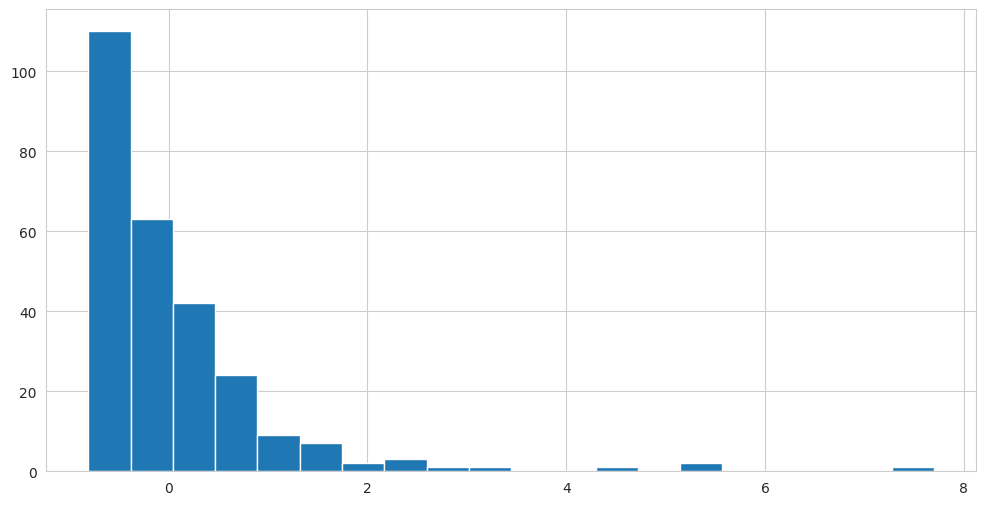

In [38]:
# distribution score
signal_features["signal_score_model"].describe()
signal_features["signal_score_model"].hist(bins=20)

In [39]:
# Features importantes

xgb_model = pipe_xgb.named_steps["model"]

importances = xgb_model.feature_importances_
feature_names = X.columns

feature_importance = (
    pd.DataFrame({"feature": feature_names, "importance": importances})
    .sort_values("importance", ascending=False)
)

display(feature_importance.head(20))

,feature,importance
10,Hbis_24_Activité internationale (industrie),0.387324
29,diversite_signaux,0.206418
7,F_6_Développement de l'activité,0.183906
14,"L_12_Levée de fonds, financements & modifs. ca...",0.031590
41,nb_signaux_10y,0.029088
16,N_14_Recrutement,0.018663
20,S_19_Lancement,0.015490
6,F_6_Croissance,0.013260
35,nb_signaux_4y,0.012461
13,K1_32_Investissements,0.011722


### Interprétation / A DISCUTER AVEC LA TEAM

| Rank  | Feature                      | Importance | Interprétation                                   |
| ----- | ---------------------------- | ---------- | ------------------------------------------------ |
| **1** | Hbis international industrie | **0.387**  | Signal international = l’indicateur le plus fort |
| **2** | diversité des signaux        | **0.206**  | Très structurant                                 |
| **3** | F développement              | **0.184**  | Forte dynamique de croissance                    |
| 4     | L levées de fonds            | 0.031      | Aspect financier                                 |
| 5     | nb_signaux_10y               | 0.029      | Historique long                                  |
| 6     | N recrutement                | 0.018      | Croissance opérationnelle                        |
| 7     | S lancement                  | 0.015      | Nouvelles offres → dynamique                     |
| 8     | F croissance                 | 0.013      | Renforce le signal croissance                    |
| 9     | nb_signaux_4y                | 0.012      | Historique récent-moyen terme                    |
| 10    | K1 investissements           | 0.011      | Croissance d’actifs                              |
| 11    | A aménagement / urbanisme    | 0.008      | Contexte d’expansion / transformation            |
| 12    | nb_signaux_5y                | 0.007      | Historique long (complément)                     |
| 13    | recency_jours                | 0.0068     | Légère prise en compte de la récence             |
| 14    | nb_signaux_8y                | 0.0063     | Historique                                       |
| 15    | O RJ/LJ                      | 0.005      | Signal négatif                                   |
| 16    | nb_signaux_3y                | 0.0048     | Historique moyen                                 |
| 17    | Construction B               | 0.0044     | Dynamique projet / croissance                    |
| 18    | nb_signaux_7y                | 0.0037     | Historique                                       |
| 19    | nb_signaux_6y                | 0.0036     | Historique                                       |
| 20    | Création & ouverture E       | 0.0033     | Croissance early stage                           |


#### ⭐ 1) Le signal dominant : internationalisation (Hbis)

Importance : 38 %
→ C’est énorme.

Cela signifie :
les entreprises ayant des signaux d’internationalisation sont systématiquement très actives
ce type de signal capte énormément de variance dans ton dataset
c’est un proxy très puissant d’activité globale

📌 Ce n’est pas surprenant :
Hbis apparaît souvent dans les historiques + correspond à des entreprises en croissance avancée.

#### ⭐ 2) La diversité redevient très importante (20 %)

Ton nettoyage des types a permis au modèle de retrouver un comportement métier cohérent :
→ “Une entreprise qui bouge sur plusieurs fronts est plus intéressante”.
C’est très logique économiquement.

#### ⭐ 3) Les signaux de développement (F) deviennent structurants (18 %)

Ça, c’est parfait pour Decidento.
Dans les runs précédents, F était noyé dans le bruit du pivot.
Maintenant qu’il est nettoyé, il ressort en 3e position, ce qui valide que :
“Croissance = activité signal”.

#### ⭐ 4) Les signaux stratégiques émergent

Faible importance mais cohérente :
Levées de fonds (L)
Recrutement (N)
Lancement (S)
Investissements (K1)

Ce sont les signaux métier que Decidento aimerait beaucoup voir contribuer.

Ton modèle les capte spontanément, sans pondération métier.

#### ⭐ 5) L’historique 10 ans reste une colonne importante (3 %)

Mais attention :
→ Elle est maintenant très loin d’être dominante (contrairement au run précédent où l’historique 4–10 ans totalisait 80 %).
→ énorme amélioration !

Tu n’as plus un modèle “volume historique”, mais un modèle métier + historique.

#### ⭐ 6) Recency joue un tout petit rôle

0.6 % → très faible.
Normal : tu as peu de signaux récents, la recency n’a aucune variance.

### Résumé


Notre nouveau modèle signal n’est plus dominé par l’historique long terme : il apprend maintenant essentiellement des signaux métier comme l’internationalisation, le développement, et la diversité, ce qui correspond beaucoup mieux à l’intuition métier Decidento.

Le score devient donc plus discriminant, plus interprétable, et plus pertinent pour une intégration dans le modèle global.

Le modèle capture :

✔ Structure métier forte
Internationalisation → 38 %
Développement / Croissance → 18 %
Diversité → 20 %

✔ Structure stratégique ouverte
Levées, Recrutements, Lancements, Investissements, Croissance early-stage

✔ Structure historique (faible mais utile)
4–10 ans encore présents mais non dominants

📌 Conclusion
Le modèle détecte désormais les signaux structurants de dynamisme économique, pas uniquement le volume historique.

### Matrices de corrélation 

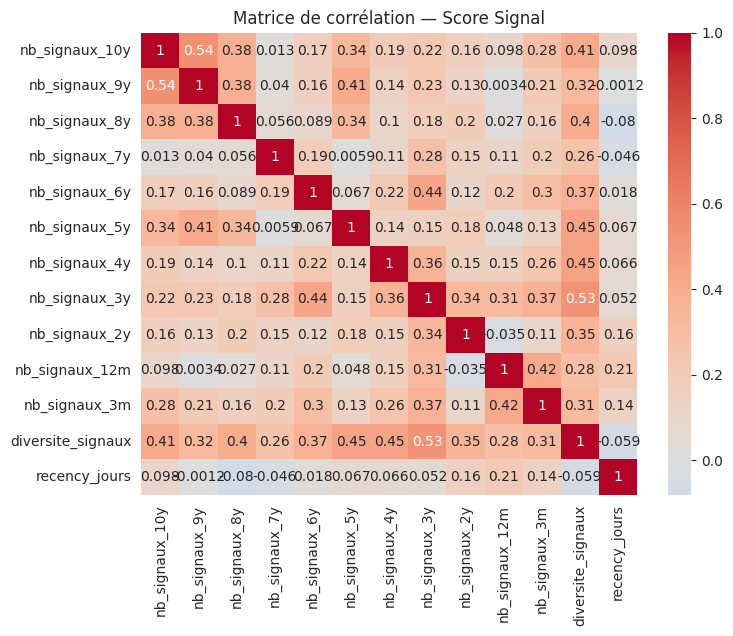

In [40]:
#pivot_cols = df_pivot.columns.tolist()

numeric_cols = [
    "nb_signaux_10y",
    "nb_signaux_9y",
    "nb_signaux_8y",
    "nb_signaux_7y",
    "nb_signaux_6y",
    "nb_signaux_5y",
    "nb_signaux_4y",
    "nb_signaux_3y",
    "nb_signaux_2y",
    "nb_signaux_12m",
    "nb_signaux_3m",
    "diversite_signaux",
    "recency_jours",
]

corr_cols = numeric_cols
#corr_cols = numeric_cols + pivot_cols

# Filtrer pour garder uniquement les colonnes existantes
corr_cols = [col for col in corr_cols if col in df_model_update.columns]

corr_df = df_model_update[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation — Score Signal")
plt.show()

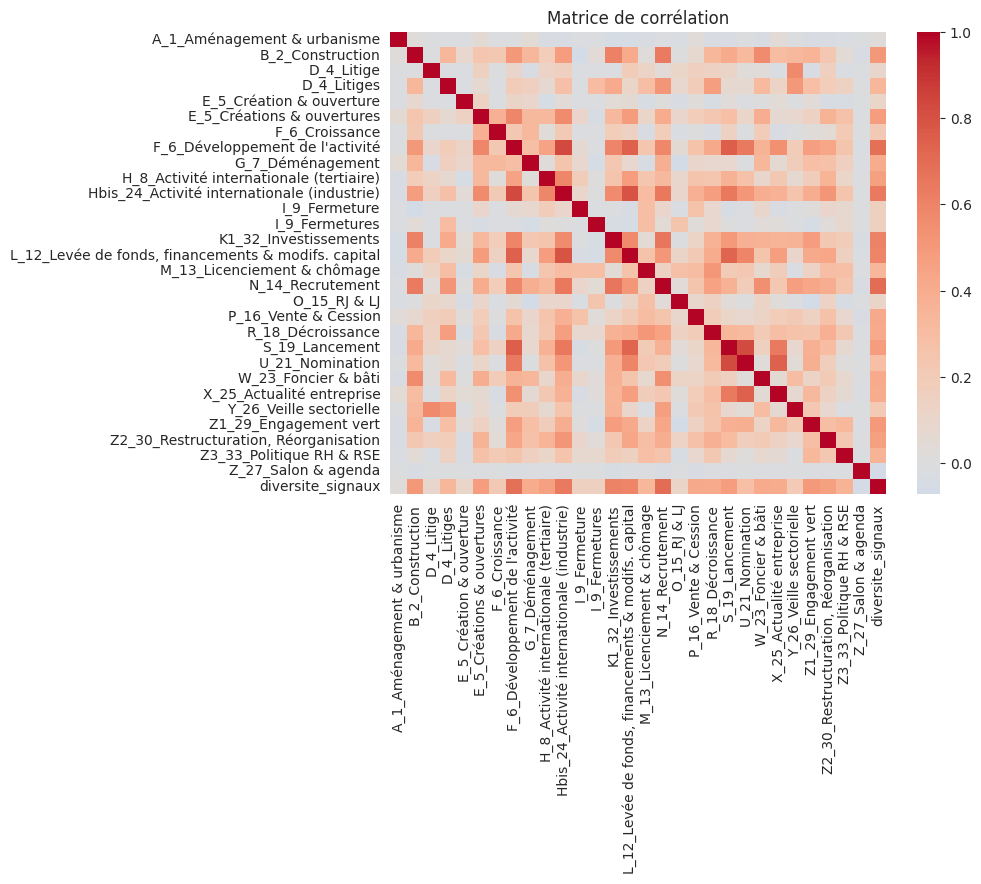

In [41]:
pivot_cols = df_pivot.columns.tolist()

corr_cols2 = pivot_cols

# Filtrer pour garder uniquement les colonnes existantes
corr_cols2 = [col for col in corr_cols2 if col in df_model_update.columns]

corr_df2 = df_model_update[corr_cols2].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df2, annot=False, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.show()

### Check résultats model vs nombre de signaux

In [42]:
# Count global par thématique
theme_counts = (
    df_sig["type_normalized"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "theme", "type_normalized": "nb_signaux"})
)

display(theme_counts)

,nb_signaux,count
0,B_2_Construction,193
1,K1_32_Investissements,168
2,N_14_Recrutement,121
3,"L_12_Levée de fonds, financements & modifs. ca...",119
4,F_6_Développement de l'activité,111
5,Hbis_24_Activité internationale (industrie),74
6,P_16_Vente & Cession,69
7,S_19_Lancement,53
8,E_5_Créations & ouvertures,41
9,U_21_Nomination,29


In [43]:
def extract_code(type_str):
    """
    À partir d'une string "{'code': 'L', 'id': 12, ...}" -> 'L', 'F', 'Hbis', etc.
    """
    try:
        d = ast.literal_eval(type_str)
        return d.get("code")
    except Exception:
        return None

df_sig["code_signal"] = df_sig["type"].apply(extract_code)

freq_by_code2 = (
    df_sig["code_signal"]
    .value_counts()
    .reset_index()
)

# Renommer explicitement les colonnes pour être sûrs
freq_by_code2.columns = ["code_signal", "freq"]

print("freq_by_code2.columns:", freq_by_code2.columns)
display(freq_by_code2.head())

# ========= Importance par code à partir de feature_importance =========

def extract_code_from_feature(feature):
    """
    'Hbis_24_Activité...' -> 'Hbis'
    'F_6_Développement...' -> 'F'
    'nb_signaux_total'     -> 'nb_signaux_total' (pas un code, c'est OK)
    """
    return feature.split("_")[0]

fi2 = feature_importance.copy()

fi2["code_signal"] = fi2["feature"].apply(extract_code_from_feature)

imp_by_code2 = (
    fi2.groupby("code_signal", as_index=False)["importance"].sum()
)

print("imp_by_code2.columns:", imp_by_code2.columns)
display(imp_by_code2.head())

# ========= Merge importance + fréquence =========

df_compare = imp_by_code2.merge(freq_by_code2, on="code_signal", how="left")

# Les features comme nb_signaux_total / diversite_signaux n'ont pas de freq -> NaN
df_compare["freq"] = df_compare["freq"].fillna(0)
df_compare["log_freq"] = np.log1p(df_compare["freq"])

display(df_compare.sort_values("importance", ascending=False))

freq_by_code2.columns: Index(['code_signal', 'freq'], dtype='object')


,code_signal,freq
0,B,193
1,K1,168
2,N,121
3,L,119
4,F,111


imp_by_code2.columns: Index(['code_signal', 'importance'], dtype='object')


,code_signal,importance
0,A,0.008389
1,B,0.004405
2,D,0.003154
3,E,0.004637
4,F,0.197166


,code_signal,importance,freq,log_freq
7,Hbis,3.873238e-01,74.0,4.317488
25,diversite,2.064180e-01,0.0,0.000000
4,F,1.971664e-01,111.0,4.718499
26,nb,7.759863e-02,0.0,0.000000
10,L,3.159035e-02,119.0,4.787492
12,N,1.866276e-02,121.0,4.804021
16,S,1.548972e-02,53.0,3.988984
9,K1,1.172199e-02,168.0,5.129899
0,A,8.388906e-03,1.0,0.693147
27,recency,6.782796e-03,0.0,0.000000


### SHAP vizualization

In [ ]:
#!pip install shap

In [44]:
import shap
# Run the following command. Needed for some visualizations.
shap.initjs()

In [45]:
# On choisit une ligne de X_test à expliquer
row_to_show = 0  # je peux changer l'index
feature_values = X_test.iloc[[row_to_show]]

# Prédiction du modèle pour cette instance
prediction = pipe_xgb.predict(feature_values)
print(f"{'Prédiction du modèle pour cette instance':<35}{prediction[0]:>7.3f}")

Prédiction du modèle pour cette instance -0.523


In [46]:
# Step 1 : créer l'explainer SHAP sur le modèle
explainer = shap.Explainer(model_tree)

# Step 2 : calculer les valeurs de SHAP pour cette instance
shap_values_one = explainer(feature_values)

# Have a look at these values
print(f"{'Base value:':<35}{shap_values_one.base_values[0]:>7.3f}")
print(f"{'Sum of SHAP values:':<35}{shap_values_one.values.sum():>7.3f}")
print(f"{'The prediction for this instance:':<35}{prediction[0]:>7.3f}")

Base value:                          0.042
Sum of SHAP values:                  0.510
The prediction for this instance:   -0.523


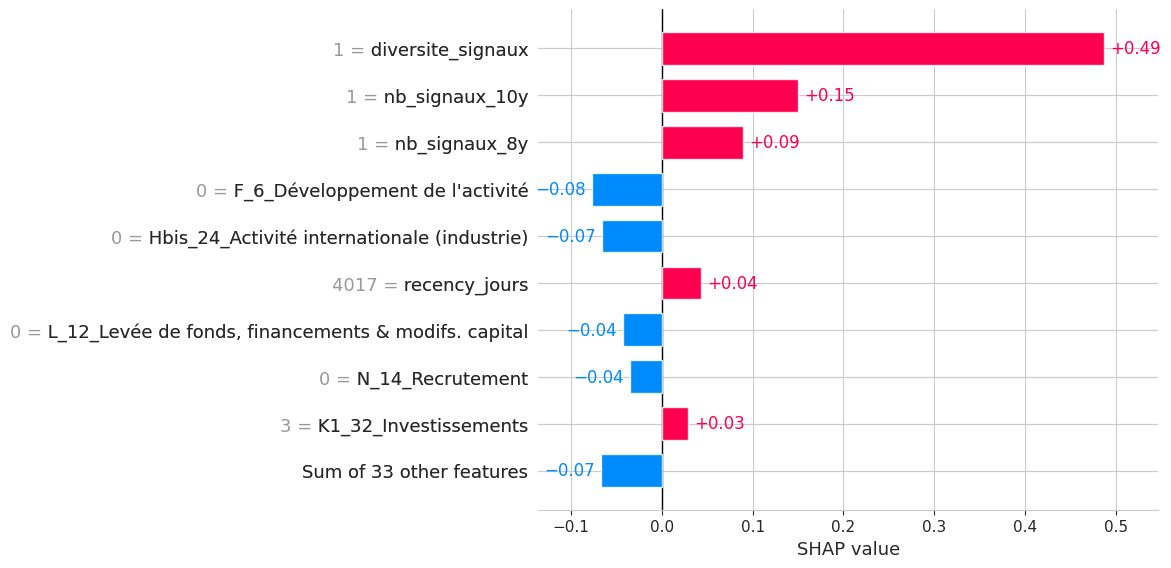

In [47]:
shap.plots.bar(shap_values_one[0])

In [48]:
shap.plots.force(shap_values_one[0])

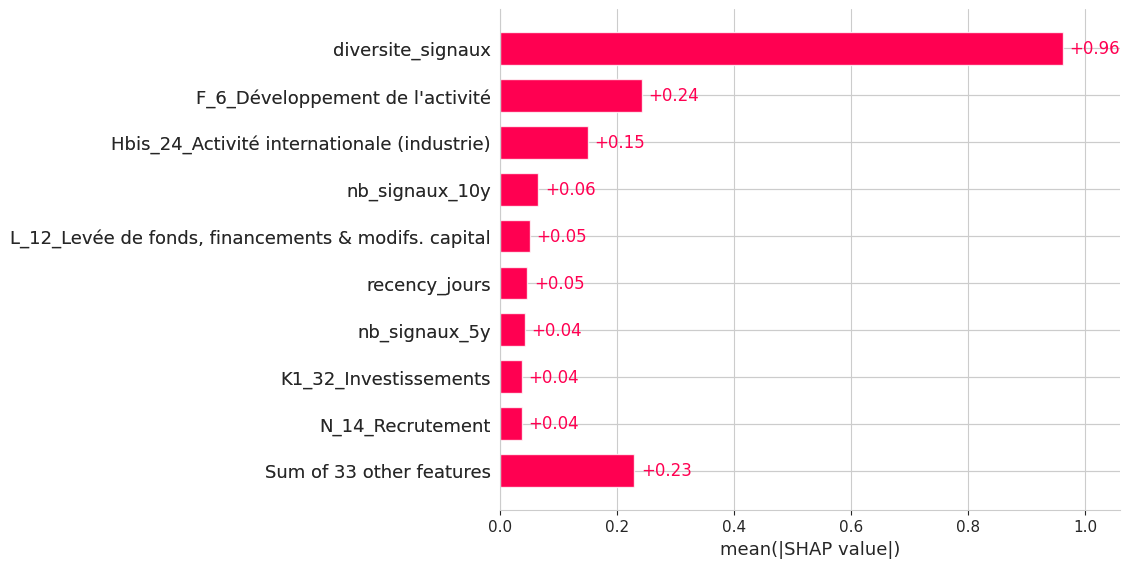

In [49]:
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

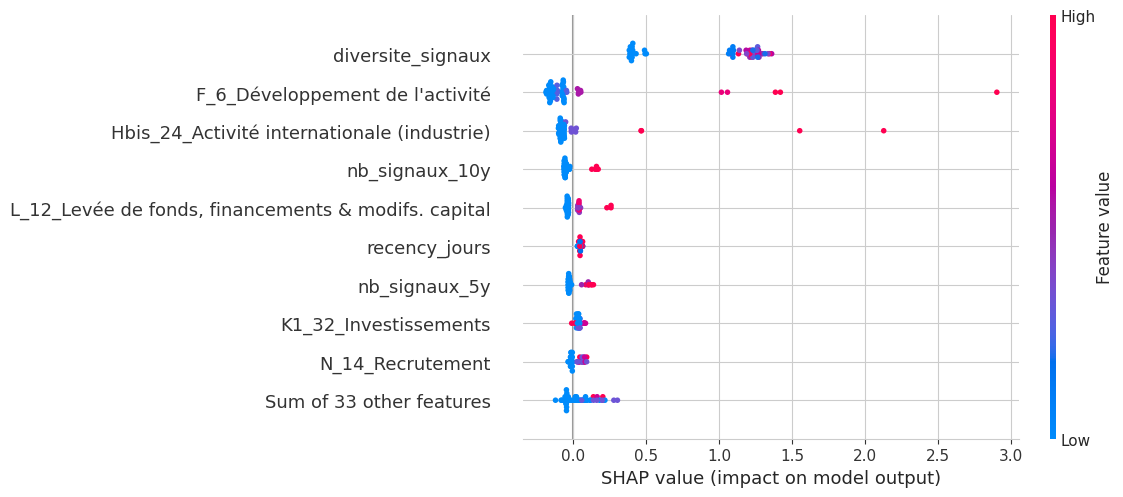

In [50]:
shap.plots.beeswarm(shap_values)